In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


In [2]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

## Helper Functions

In [3]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [4]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [5]:
#Params
term = 'Restaurants'
location = 'Brooklyn'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [6]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

15200 total matches found.
20


In [7]:
all_restaurants[0][0]

{'id': '2-z6dRAkKupCyz1LF251pQ',
 'alias': 'jintana-thai-farmhouse-brooklyn',
 'name': 'Jintana Thai Farmhouse',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/adSu7Wk66v4TsbQ9KNmOHQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/jintana-thai-farmhouse-brooklyn?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 60,
 'categories': [{'alias': 'thai', 'title': 'Thai'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.666597, 'longitude': -73.98211},
 'transactions': ['restaurant_reservation'],
 'location': {'address1': '344 7th Ave',
  'address2': '',
  'address3': None,
  'city': 'Brooklyn',
  'zip_code': '11215',
  'country': 'US',
  'state': 'NY',
  'display_address': ['344 7th Ave', 'Brooklyn, NY 11215']},
 'phone': '+17187881922',
 'display_phone': '(718) 788-1922',
 'distance': 3939.448150743429}

In [8]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [9]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [10]:
len(parsed_restaurants_v1)

1000

In [11]:
parsed_restaurants_v1

[{'restaurant_id': '2-z6dRAkKupCyz1LF251pQ',
  'restaurant_name': 'Jintana Thai Farmhouse',
  'price': '',
  'rating': 4.5,
  'review_count': 60},
 {'restaurant_id': 'E8gpCgCVaO2hNEPTrh4n2A',
  'restaurant_name': 'The Ryerson',
  'price': '',
  'rating': 5.0,
  'review_count': 28},
 {'restaurant_id': '49ST--X1jcIPzUIM1O3K6w',
  'restaurant_name': 'Mominette',
  'price': '$$',
  'rating': 4.0,
  'review_count': 652},
 {'restaurant_id': 'GA5msU6NO9rQRctPfDJCBg',
  'restaurant_name': 'Peaches HotHouse',
  'price': '$$',
  'rating': 4.0,
  'review_count': 1117},
 {'restaurant_id': 'GxMhN2PEttvw7CRGIzB6Gg',
  'restaurant_name': "Baron's",
  'price': '$$',
  'rating': 4.5,
  'review_count': 268},
 {'restaurant_id': '_iPthQyOqcwanZcVZ28M2Q',
  'restaurant_name': 'Franklin820',
  'price': '$$',
  'rating': 4.0,
  'review_count': 64},
 {'restaurant_id': 'swKXaURwqdSrSTcpHsxdbA',
  'restaurant_name': 'Lowerline',
  'price': '$$',
  'rating': 4.5,
  'review_count': 132},
 {'restaurant_id': '1x2hn

In [12]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [13]:
df.head()

,price,rating,restaurant_id,restaurant_name,review_count
0,,4.5,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,60
1,,5.0,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,28
2,$$,4.0,49ST--X1jcIPzUIM1O3K6w,Mominette,652
3,$$,4.0,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,1117
4,$$,4.5,GxMhN2PEttvw7CRGIzB6Gg,Baron's,268


In [14]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_2.xlsx")

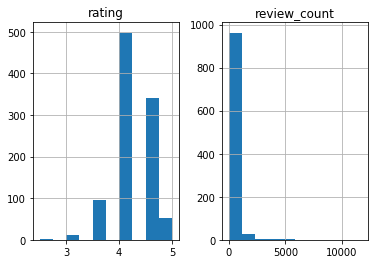

In [15]:
df.hist()
plt.show()

In [16]:
restaurant_id_list = list(df.restaurant_id)

In [17]:
restaurant_id_list

['2-z6dRAkKupCyz1LF251pQ',
 'E8gpCgCVaO2hNEPTrh4n2A',
 '49ST--X1jcIPzUIM1O3K6w',
 'GA5msU6NO9rQRctPfDJCBg',
 'GxMhN2PEttvw7CRGIzB6Gg',
 '_iPthQyOqcwanZcVZ28M2Q',
 'swKXaURwqdSrSTcpHsxdbA',
 '1x2hn3e9sCCZca1cnRTpEg',
 'eN8Cmf0Vxucyg02NyP7mbw',
 'nOjGNqPcu5jHRRElOndQqQ',
 'CwOAKJdX8AMz5iAoA-ZEuA',
 'YwpP-mgXV5N35xhLibLw5g',
 'RfxOtJ4SQmEeVX_XjFLWUQ',
 'KkAtVVjnMfb1vGlcpzmhgw',
 'el63-4CunMQQBIYpLayFTg',
 'SSDOkx5enfRH3nsniS_2jA',
 'tXWA5kUJnZY_NbED1-ST0g',
 'dkAj-3gmkvdA4XkJmw6hCw',
 'mxDfu4bHwSXoCr3FRpyMsw',
 'VDz9n7gwcq51wOAbTBdXxA',
 'OzgvdC0oJPh1FQTLJF2yXw',
 'Ms3CAGddVbgetiQrpzqxPQ',
 '16heVvLqYfLpl8mC1RN3Bg',
 'x_YWFkTcxEu1lo8Nlrog5A',
 'unePwYAUWb7oC8RBt84e3A',
 '4KHjnRNvrkKHchEznhlnSA',
 'wnyX_yg4ddSDkupwFKftIA',
 'DOdamkEm9JWR9s6VH_NuOQ',
 'NDIrifAl6K-RrnZ2D3ZGbw',
 'hdiTkEnD14VpXNl-APTg2g',
 'rU9cKxAVU4Gd_JhAqp_bTA',
 'j9TdOBSQ1LRw8v3hW5fObQ',
 'TRVWU2c4SzbsgWOo6Dz2Aw',
 'SKiRMBoiZkxksHN4S0ZzJg',
 '6AgpmRu1zjO_eNhoMhTE-A',
 'eOxGkxi5hEY426ww5qk3GA',
 'Pn5B8A4P23d5_FE6y8A2wA',
 

## Test Scrape for 1 Restaurant

In [18]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = '2-z6dRAkKupCyz1LF251pQ'
full_url = url_prefix+test_id+url_suffix

In [19]:
full_url

'https://www.yelp.com/biz/2-z6dRAkKupCyz1LF251pQ?rh_type=phrase'

In [20]:
source = requests.get(full_url).text

In [21]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [22]:
soup = BeautifulSoup(source,'lxml')

In [23]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [24]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [25]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">I was very impressed with their food on my first visit, so I decided to try them again.  The food quality remains high and significantly above the typical Park Slope style Thai food along 7th avenue. I have tried four or five different Thai restaurants over the past two years, and this one is by far the best in the neighborhood.  Conveniently located near the 7th Ave &amp; 9th Street, F/G subway.  I ordered take out, but they have seating if you prefer to dine in.<br/><br/>Gai Yang (grilled chicken) - Unbelievable flavor, and moist.  The chicken has a really nice grilled char that is not mentioned in the menu description.<br/><br/>Pad See Yew (flat noodles with shrimp) - Great flavor and they use fresh shrimp that isn't stringy.<br/><br/>Poh Pia Tod (crispy veggie spring rolls) - Great vegetarian option.   Full of flavor, nice and crunchy, not greasy.<br/><br/>Jintana's Moo Tod (spice rubbed baby back ribs) - Very tender and the meat fa

In [26]:
reviews_section.text

"I was very impressed with their food on my first visit, so I decided to try them again. \xa0The food quality remains high and significantly above the typical Park Slope style Thai food along 7th avenue. I have tried four or five different Thai restaurants over the past two years, and this one is by far the best in the neighborhood. \xa0Conveniently located near the 7th Ave & 9th Street, F/G subway. \xa0I ordered take out, but they have seating if you prefer to dine in.Gai Yang (grilled chicken) - Unbelievable flavor, and moist. \xa0The chicken has a really nice grilled char that is not mentioned in the menu description.Pad See Yew (flat noodles with shrimp) - Great flavor and they use fresh shrimp that isn't stringy.Poh Pia Tod (crispy veggie spring rolls) - Great vegetarian option. \xa0 Full of flavor, nice and crunchy, not greasy.Jintana's Moo Tod (spice rubbed baby back ribs) - Very tender and the meat falls off the bone. \xa0I believe you get 5 ribs.Their soups look and smell grea

In [27]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">I was very impressed with their food on my first visit, so I decided to try them again.  The food quality remains high and significantly above the typical Park Slope style Thai food along 7th avenue. I have tried four or five different Thai restaurants over the past two years, and this one is by far the best in the neighborhood.  Conveniently located near the 7th Ave &amp; 9th Street, F/G subway.  I ordered take out, but they have seating if you prefer to dine in.<br/><br/>Gai Yang (grilled chicken) - Unbelievable flavor, and moist.  The chicken has a really nice grilled char that is not mentioned in the menu description.<br/><br/>Pad See Yew (flat noodles with shrimp) - Great flavor and they use fresh shrimp that isn't stringy.<br/><br/>Poh Pia Tod (crispy veggie spring rolls) - Great vegetarian option.   Full of flavor, nice and crunchy, not greasy.<br/><br/>Jintana's Moo Tod (spice rubbed baby back ribs) - Very tender and the meat f

In [28]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [29]:
reviews

[{0: "I was very impressed with their food on my first visit, so I decided to try them again. \xa0The food quality remains high and significantly above the typical Park Slope style Thai food along 7th avenue. I have tried four or five different Thai restaurants over the past two years, and this one is by far the best in the neighborhood. \xa0Conveniently located near the 7th Ave & 9th Street, F/G subway. \xa0I ordered take out, but they have seating if you prefer to dine in.Gai Yang (grilled chicken) - Unbelievable flavor, and moist. \xa0The chicken has a really nice grilled char that is not mentioned in the menu description.Pad See Yew (flat noodles with shrimp) - Great flavor and they use fresh shrimp that isn't stringy.Poh Pia Tod (crispy veggie spring rolls) - Great vegetarian option. \xa0 Full of flavor, nice and crunchy, not greasy.Jintana's Moo Tod (spice rubbed baby back ribs) - Very tender and the meat falls off the bone. \xa0I believe you get 5 ribs.Their soups look and smell

In [36]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop2.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [37]:
full_reviews = scrape_list(restaurant_id_list)


 15%|█▍        | 146/1000 [1:11:36<7:15:45, 30.61s/it]


 29%|██▊       | 287/1000 [2:18:20<5:09:56, 26.08s/it]


 43%|████▎     | 428/1000 [3:26:51<4:03:52, 25.58s/it]


 57%|█████▋    | 569/1000 [4:32:49<3:35:33, 30.01s/it]


 71%|███████   | 710/1000 [5:36:32<2:06:12, 26.11s/it]


 85%|████████▌ | 851/1000 [6:39:29<1:09:30, 27.99s/it]


100%|█████████▉| 995/1000 [8:43:09<04:55, 59.16s/it]


100%|██████████| 1000/1000 [8:48:33<00:00, 64.29s/it]

In [61]:
len(full_reviews)

115660

In [62]:
full_reviews

[('ehUuSk5gPTCQmwS_ubgKRA',
  "Had a reservation on Saturday night for dinner. Everything we ordered was incredible. We started with half a dozen oysters and the tuna tartare. Oysters were fresh and tasty. Tuna tartare was really yummy, it came served with bread but I would've enjoyed plantain chips too. For entrees, we split the scallops and grilled octopus. Both were flavorful and cooked to perfection. I want to come back for happy hour!"),
 ('ehUuSk5gPTCQmwS_ubgKRA',
  "While it's not my new go-to place for seafood, I still liked it.Came here on a Sunday night -- made a reservation through Yelp -- and it was pretty packed. I saw some people were turned away, so definitely make a reservation just in case.My friend and I just went straight to entrees: surf and turf (hangar steak and grilled shrimp with sugar snap peas, fingerling potatoes, & balsamic reduction) and the scallops special (deep diver scallops over mushroom brown rice risotto). Both dishes were delish and what think is re

In [65]:
tuple_reviews=[(restid, review) for i in range(len(full_reviews)) for restid, review in full_reviews[i]]

ValueError: too many values to unpack (expected 2)

In [64]:
import pickle
 
with open('reviews_v3.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [ ]:
len(tuple_reviews)

In [66]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [67]:
data.to_csv('reviews2.csv')

In [68]:
pd.options.display.max_columns = 999
data['count'] = [x for x in range(len(data))]

In [74]:
pd.options.display.max_rows = 999

In [75]:
data

,Restaurant_Id,Review,count
0,ehUuSk5gPTCQmwS_ubgKRA,Had a reservation on Saturday night for dinner...,0
1,ehUuSk5gPTCQmwS_ubgKRA,"While it's not my new go-to place for seafood,...",1
2,ehUuSk5gPTCQmwS_ubgKRA,Mehhhhh. Overrated in my opinion.We walked in ...,2
3,ehUuSk5gPTCQmwS_ubgKRA,"Unfortunately, dinner here was pretty disappoi...",3
4,ehUuSk5gPTCQmwS_ubgKRA,"This place is overrated, i would give only 2 s...",4
5,ehUuSk5gPTCQmwS_ubgKRA,Came here on a Friday night around 6:30pm and ...,5
6,ehUuSk5gPTCQmwS_ubgKRA,"I've been here twice and both times, I was pre...",6
7,ehUuSk5gPTCQmwS_ubgKRA,Great place. The waiter was extremely helpful ...,7
8,ehUuSk5gPTCQmwS_ubgKRA,This place is an affordable gem! Perfect for a...,8
9,ehUuSk5gPTCQmwS_ubgKRA,After hearing tons of people rave about this s...,9


In [ ]:
len(pivot_table)

In [ ]:
pivot_table = data.pivot_table(index=['Restaurant_Id'],
                               columns=['col_rev_'],
                             values=['Review'],
                             aggfunc=lambda x: ' '.join(str(v) for v in x))

In [ ]:
data.Restaurant_Id.nunique()

In [ ]:
pivot_table.columns = pivot_table.columns.droplevel()